In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
data=pd.read_csv(r"Data for Credit Card Analytics.csv")

In [16]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

# Data Pre-processing

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [18]:
data.shape

(8950, 18)

In [19]:
data.drop("CUST_ID",axis=1,inplace = True)

In [20]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [21]:
data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.mean(), inplace = True) 

In [22]:
data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.mean(),inplace = True)

In [23]:
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [24]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.612411   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2330.588021          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        335.628312          0.000000    12.000000  
75%     1901.134317        864.206542          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

1. Balance has a higher level of correlation with Cash Advance, Cash Advance Frequency and Credit Limit. 
2. Payments variable has a high correletion with Purchases and one off Purchases. 
3. Tenure has a negative correlation with Cash Advance and Cash Advance Frequency variables.

In [25]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [26]:
num=list()
for a in data.columns:
    if a in ll.index:
        num.append(a)

In [27]:
data=data[num]

In [28]:
df = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]

In [29]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     40.900749           0.818182      95.40              0.00   
4    817.714335           1.000000      16.00             16.00   
7   1823.652743           1.000000     436.20              0.00   
8   1014.926473           1.000000     861.49            661.49   
14  2772.772734           1.000000       0.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     95.4       0.00000             0.166667   
4                      0.0       0.00000             0.083333   
7                    436.2       0.00000             1.000000   
8                    200.0       0.00000             0.333333   
14                     0.0     346.81139             0.000000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.000000                          0.083333   
4                     0.083333                          0.000000   
7                     0.000000                          1.000000   
8                     0.083333                          0.250000   
14                    0.000000                          0.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                 0.000000                 0              2        1000.0   
4                 0.000000                 0              1        1200.0   
7                 0.000000                 0             12        2300.0   
8                 0.000000                 0              5        7000.0   
14                0.083333                 1              0        3000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787               0.0      12  
4   678.334763        244.791237               0.0      12  
7   679.065082        532.033990               0.0      12  
8   688.278568        311.963409               0.0      12  
14  805.647974        989.962866               0.0      12

In [30]:
df.shape

(3008, 17)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3008 entries, 0 to 8760
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           3008 non-null   float64
 1   BALANCE_FREQUENCY                 3008 non-null   float64
 2   PURCHASES                         3008 non-null   float64
 3   ONEOFF_PURCHASES                  3008 non-null   float64
 4   INSTALLMENTS_PURCHASES            3008 non-null   float64
 5   CASH_ADVANCE                      3008 non-null   float64
 6   PURCHASES_FREQUENCY               3008 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        3008 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  3008 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            3008 non-null   float64
 10  CASH_ADVANCE_TRX                  3008 non-null   int64  
 11  PURCHASES_TRX                     3008 non-null   int64  
 12  CREDIT

In [32]:
df.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  3008.000000        3008.000000  3008.000000       3008.000000   
mean   1211.006193           0.979147   376.689591        199.997414   
std    1034.501754           0.061624   444.243460        332.843528   
min       1.198223           0.727273     0.000000          0.000000   
25%     382.190423           1.000000     0.000000          0.000000   
50%    1042.819730           1.000000   219.885000          0.000000   
75%    1689.490290           1.000000   575.760000        270.182500   
max    4940.113918           1.000000  2315.860000       1443.330000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             3008.000000   3008.000000          3008.000000   
mean               176.942583    417.363333             0.392260   
std                256.565954    649.905703             0.372625   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.000000   
50%                 18.230000     38.941802             0.333333   
75%                291.737500    627.814948             0.750000   
max               1170.490000   2780.106659             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 3008.000000                       3008.000000   
mean                     0.115220                          0.301695   
std                      0.173047                          0.374583   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.083333   
75%                      0.166667                          0.583333   
max                      0.750000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             3008.000000       3008.000000    3008.000000   3008.000000   
mean                 0.101369          1.777261       7.649934   3192.031854   
std                  0.127473          2.424570       8.835947   2420.140805   
min                  0.000000          0.000000       0.000000    150.000000   
25%                  0.000000          0.000000       0.000000   1500.000000   
50%                  0.083333          1.000000       5.000000   2500.000000   
75%                  0.166667          3.000000      12.000000   4000.000000   
max                  0.500000         10.000000      41.000000  13500.000000   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
count  3008.000000       3008.000000       3008.000000  3008.0  
mean    817.027549        482.185353          0.028257    12.0  
std     696.317246        364.718192          0.068379     0.0  
min       0.000000          2.891346          0.000000    12.0  
25%     352.941634        200.832467          0.000000    12.0  
50%     603.215637        361.097238          0.000000    12.0  
75%    1041.996954        660.790899          0.000000    12.0  
max    4138.243604       1900.025531          0.333333    12.0

In [33]:
graph_by_variables = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

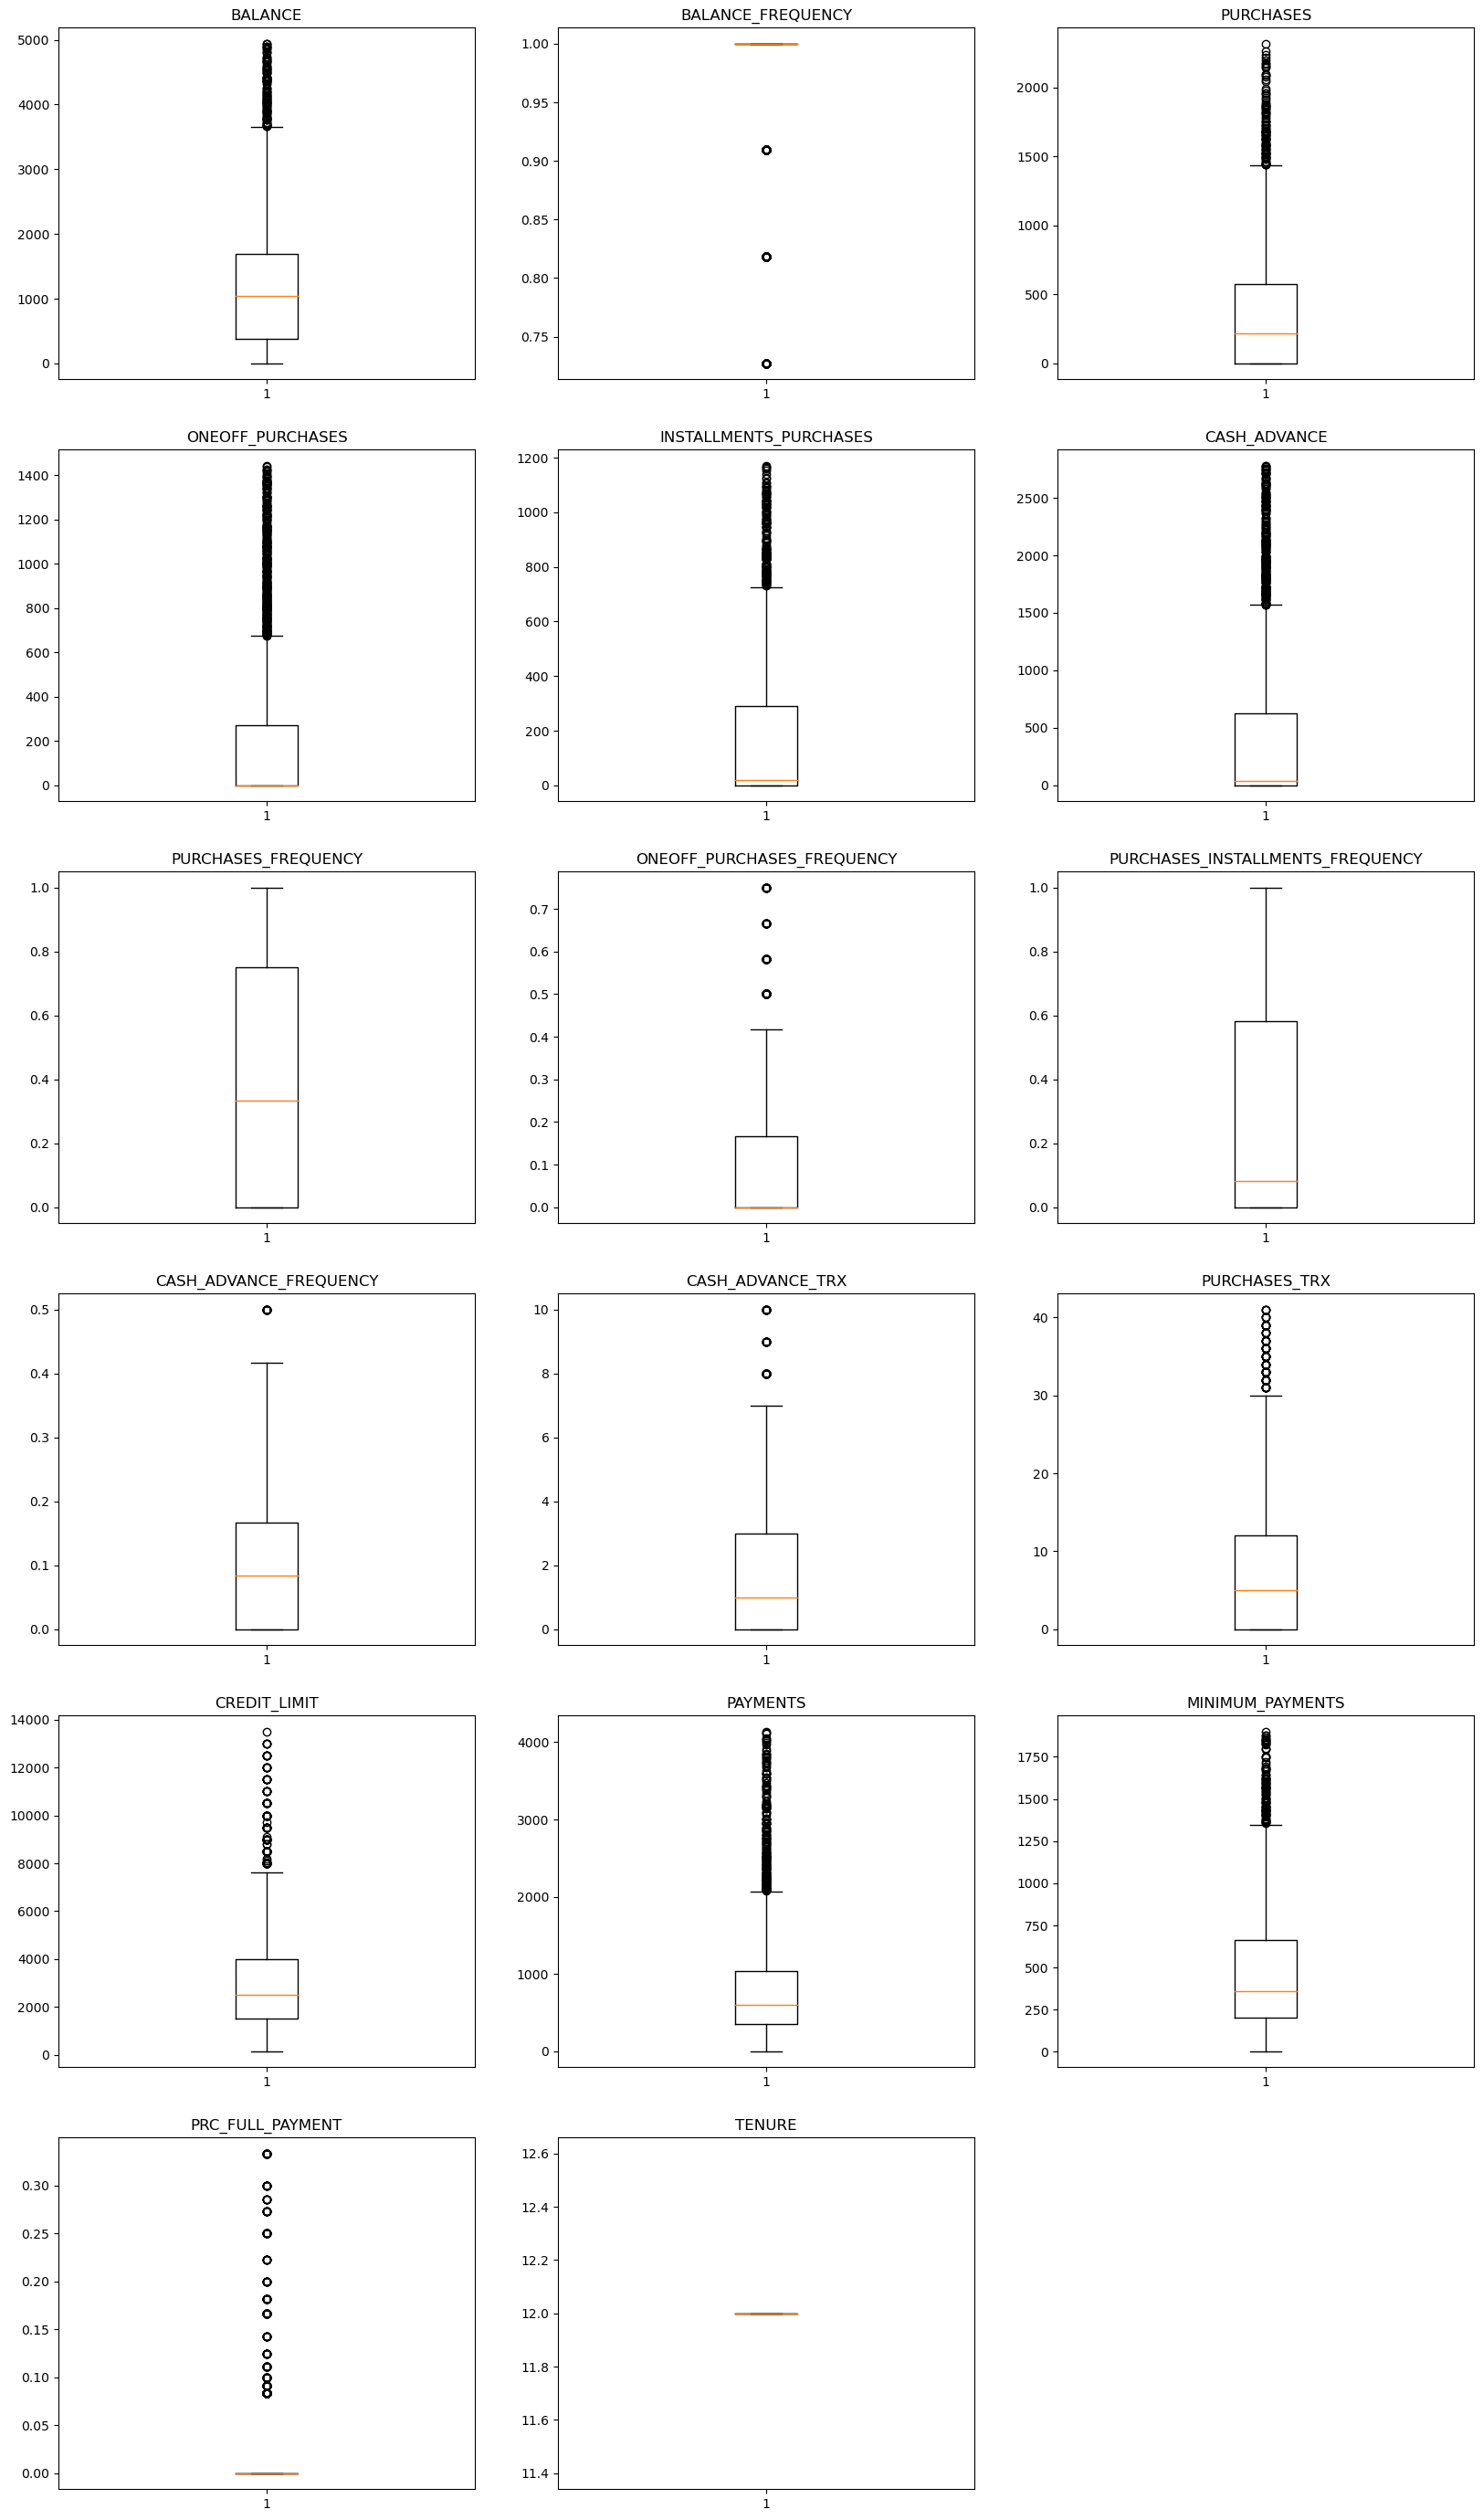

In [34]:
plt.figure(figsize=(20,35))

for i in range(0,17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(df[graph_by_variables[i]].dropna())
    plt.title(graph_by_variables[i])

# Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation Matrix')

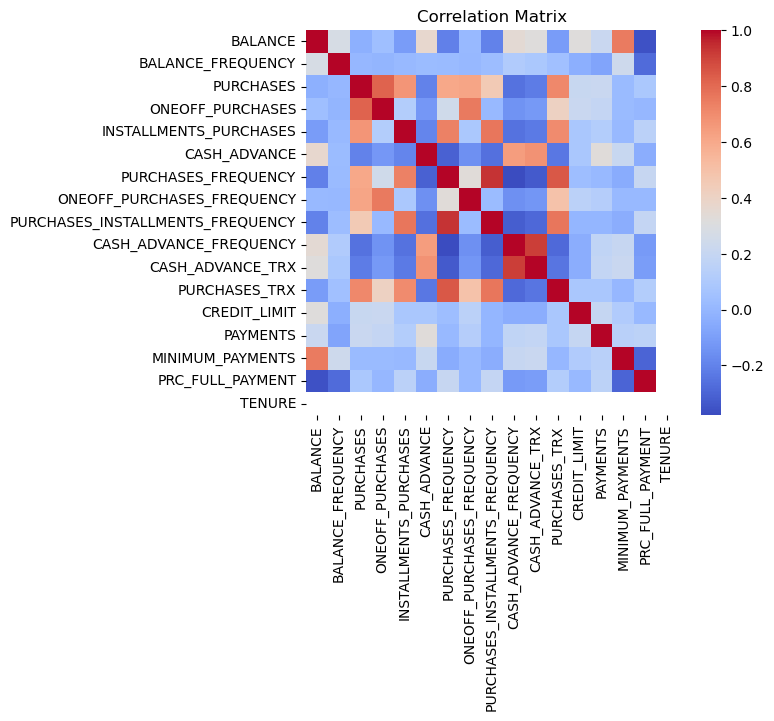

In [36]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(),cmap='coolwarm')

plt.title('Correlation Matrix')

1. There is a stronger correlation between Balance and Cash Advance, Cash Advance Frequency, and Credit Limit.
2. The Payments variable shows a high correlation with Purchases and one-off Purchases.
3. Tenure exhibits a negative correlation with Cash Advance and Cash Advance Frequency variables.

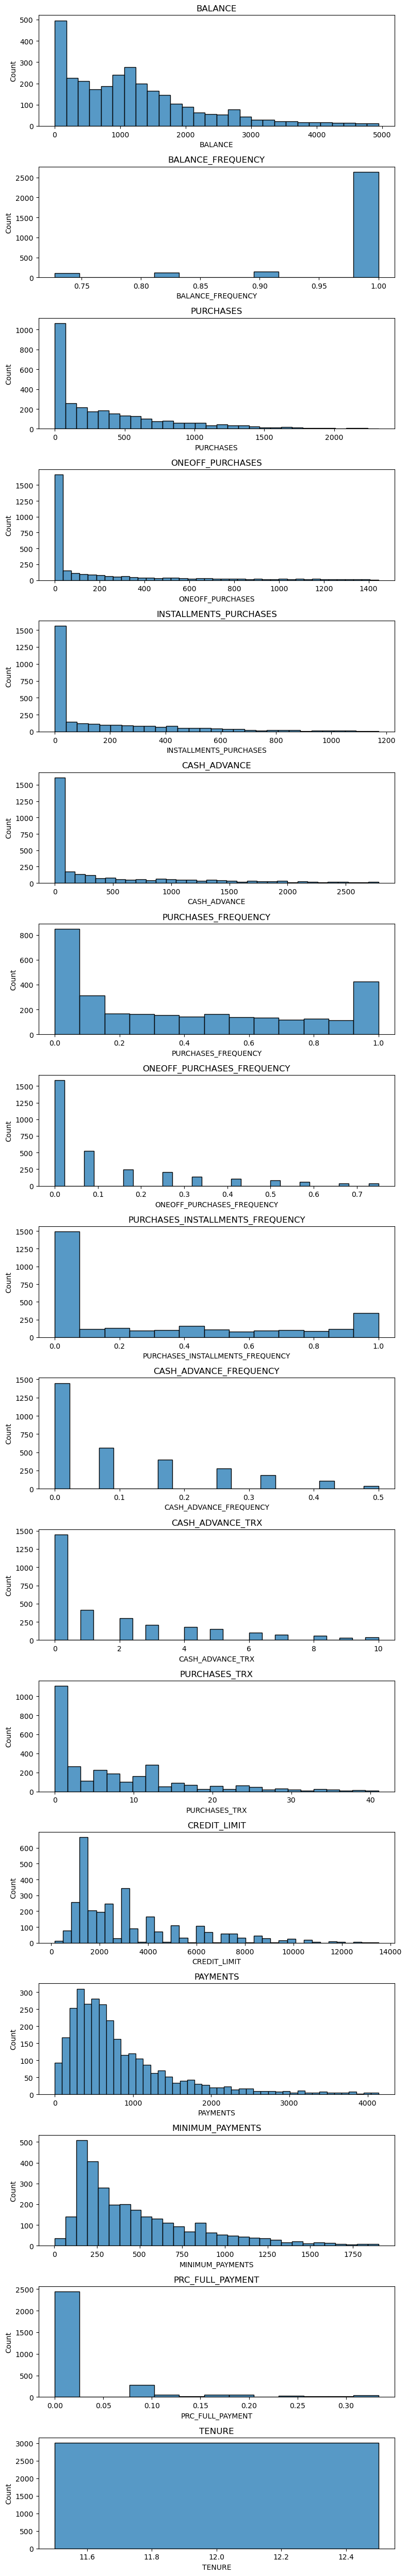

In [46]:
plt.figure(figsize=(8,50))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.histplot(df[df.columns[i]],kde_kws={'color':'b','bw_method': 0.1})
    plt.title(df.columns[i])
plt.tight_layout()

1. 'Balance_Frequency' for most customers is updated frequently ~ 1
2. Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT' ~ 0
3. Most customers are ~ 12 years tenure
4. For 'PURCHASES_FREQUENCY', there are two distinct group of customers
5. The frequency of 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' indicates that most users do not engage in one-off purchases or installment purchases frequently.

# KPIs

###  Monthly average purchase 

In [40]:
print(df['Monthly_avg_purchase'].head(),'\n ',
df['TENURE'].head(),'\n', df['PURCHASES'].head())

0      7.950000
4      1.333333
7     36.350000
8     71.790833
14     0.000000
Name: Monthly_avg_purchase, dtype: float64 
  0     12
4     12
7     12
8     12
14    12
Name: TENURE, dtype: int64 
 0      95.40
4      16.00
7     436.20
8     861.49
14      0.00
Name: PURCHASES, dtype: float64


### Cash advance amount

In [49]:
df['Monthly_cash_advance']= df['CASH_ADVANCE'] / df['TENURE']

C:\Users\vrichand\AppData\Local\Temp\ipykernel_22584\3437567878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Monthly_cash_advance']= df['CASH_ADVANCE'] / df['TENURE']


In [50]:
df[df['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

1586

### Purchases by type (one-off, installments)

In [51]:
df.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
0                 0.00                   95.40
4                16.00                    0.00
7                 0.00                  436.20
8               661.49                  200.00
14                0.00                    0.00
...                ...                     ...
8738           1370.00                    0.00
8742              0.00                  605.52
8747            124.70                  316.80
8759              0.00                  295.00
8760            409.30                  500.00

[3008 rows x 2 columns]

In [52]:
def purchase(df):
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [53]:
df['purchase_type']=df.apply(purchase, axis=1)

C:\Users\vrichand\AppData\Local\Temp\ipykernel_22584\588684545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purchase_type']=df.apply(purchase, axis=1)


In [54]:
df['purchase_type'].value_counts()

none                       848
both_oneoff_installment    778
installment                738
one_off                    644
Name: purchase_type, dtype: int64

### Limit usage (balance to credit limit ratio)

In [55]:
df['limit_usage'] = df.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

C:\Users\vrichand\AppData\Local\Temp\ipykernel_22584\211646062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['limit_usage'] = df.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)


In [56]:
df['limit_usage'].head()

0     0.040901
4     0.681429
7     0.792892
8     0.144989
14    0.924258
Name: limit_usage, dtype: float64

### Payments to minimum payments ratio etc (think of more types of similar analysis)

In [57]:
df['PAYMENTS'].isnull().any()
df['MINIMUM_PAYMENTS'].isnull().value_counts()

False    3008
Name: MINIMUM_PAYMENTS, dtype: int64

In [58]:
df['MINIMUM_PAYMENTS'].describe()

count    3008.000000
mean      482.185353
std       364.718192
min         2.891346
25%       200.832467
50%       361.097238
75%       660.790899
max      1900.025531
Name: MINIMUM_PAYMENTS, dtype: float64

In [59]:
df['payment_minpay']= df.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)

C:\Users\vrichand\AppData\Local\Temp\ipykernel_22584\1779734905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payment_minpay']= df.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)


In [60]:
df['payment_minpay']

0       1.446508
4       2.771075
7       1.276357
8       2.206280
14      0.813816
          ...   
8738    1.321314
8742    2.923430
8747    5.283648
8759    1.470084
8760    5.262109
Name: payment_minpay, Length: 3008, dtype: float64

## Gain insight on the customer profiles

<Axes: ylabel='purchase_type'>

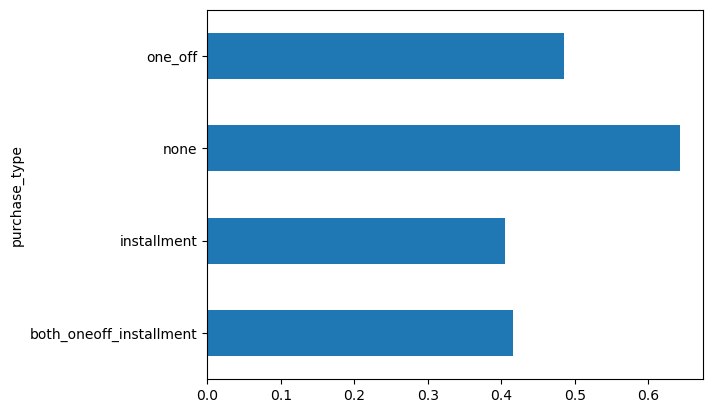

In [61]:
df.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

Customers who refrain from making one-off or installment purchases tend to take more cash advances.

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

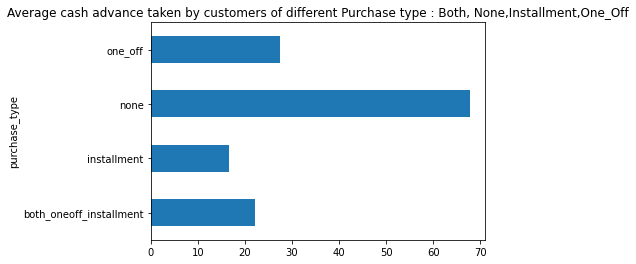

In [39]:
df.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()
plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

Customers with installment purchases are paying dues

In [40]:
x=df.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([3.19059162, 3.06888076, 2.6531295 , 2.4163443 ])

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

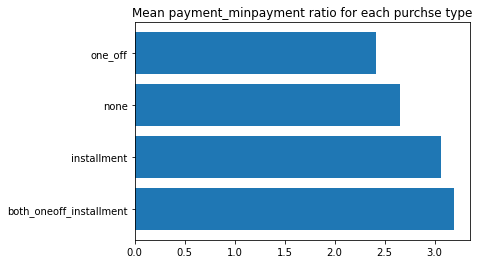

In [41]:
fig,ax=plt.subplots()
ax.barh(y=range(len(x)), width=x.values,align='center')
ax.set(yticks= np.arange(len(x)),yticklabels = x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

Average payment_minpayment ratio for each purchase type

# Clustering

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.decomposition import FactorAnalysis

In [63]:
scaler = StandardScaler()
df_std=pd.DataFrame(scaler.fit_transform(data))

In [64]:
for i in range(len(data.columns)):
    df_std.rename(columns={i:data.columns[i]},inplace=True)

In [65]:
df_std.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960433   
1                0.573963          0.110074      -0.591796      0.688639   
2               -0.675349         -0.476070      -0.109020      0.826062   
3               -0.258913         -0.329534      -0.551565      0.826062   
4               -0.675349         -0.476070      -0.551565     -0.905464   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0 -0.528979     -3.109675e-01         -0.525551  0.36068  
1  0.818642      8.931021e-02          0.234227  0.36068  
2 -0.383805     -1.016632e-01         -0.525551  0.36068  
3 -0.598688      4.878305e-17         -0.525551  0.36068  
4 -0.364368     -2.657913e-01         -0.525551  0.36068

In [66]:
transformer = FactorAnalysis(n_components=10, random_state=0)

In [67]:
transformer.fit(df_std)

FactorAnalysis(n_components=10)

In [68]:
components_df=pd.DataFrame(transformer.components_)
for i in range(len(data.columns)):
    components_df.rename(columns={i:data.columns[i]},inplace=True)

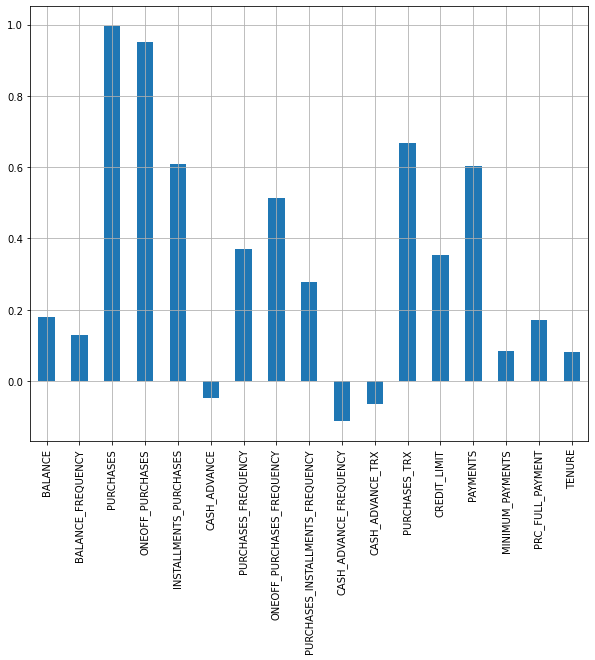

In [50]:
plt.figure(figsize=(10,8))
components_df.loc[0].plot(kind="bar")
plt.grid(True)

In [51]:
components_df.loc[0].sort_values()

CASH_ADVANCE_FREQUENCY             -0.113239
CASH_ADVANCE_TRX                   -0.063325
CASH_ADVANCE                       -0.047577
TENURE                              0.082430
MINIMUM_PAYMENTS                    0.084414
BALANCE_FREQUENCY                   0.128867
PRC_FULL_PAYMENT                    0.172009
BALANCE                             0.180024
PURCHASES_INSTALLMENTS_FREQUENCY    0.276555
CREDIT_LIMIT                        0.353649
PURCHASES_FREQUENCY                 0.369170
ONEOFF_PURCHASES_FREQUENCY          0.512216
PAYMENTS                            0.603928
INSTALLMENTS_PURCHASES              0.608515
PURCHASES_TRX                       0.666358
ONEOFF_PURCHASES                    0.950097
PURCHASES                           0.995634
Name: 0, dtype: float64

In [52]:
cluster_df=data[['PURCHASES','ONEOFF_PURCHASES','PURCHASES_TRX','ONEOFF_PURCHASES_FREQUENCY','INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CREDIT_LIMIT','PAYMENTS','CASH_ADVANCE_FREQUENCY']]

In [53]:
cluster_df.head()

PURCHASES  ONEOFF_PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
0      95.40              0.00              2                    0.000000   
1       0.00              0.00              0                    0.000000   
2     773.17            773.17             12                    1.000000   
3    1499.00           1499.00              1                    0.083333   
4      16.00             16.00              1                    0.083333   

   INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  \
0                    95.4             0.166667   
1                     0.0             0.000000   
2                     0.0             1.000000   
3                     0.0             0.083333   
4                     0.0             0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CREDIT_LIMIT     PAYMENTS  \
0                          0.083333        1000.0   201.802084   
1                          0.000000        7000.0  4103.032597   
2                          0.000000        7500.0   622.066742   
3                          0.000000        7500.0     0.000000   
4                          0.000000        1200.0   678.334763   

   CASH_ADVANCE_FREQUENCY  
0                0.000000  
1                0.250000  
2                0.000000  
3                0.083333  
4                0.000000

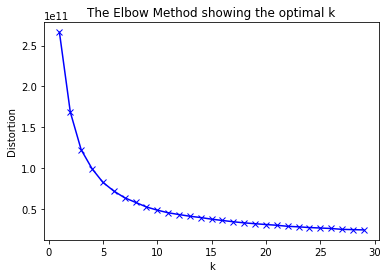

In [54]:
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster_df)
    distortions.append(kmeanModel.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Let's choose n=8 clusters

In [55]:
km = KMeans(init="random", n_clusters=8)
y_pred = km.fit(cluster_df)

In [56]:
labels=km.labels_

In [57]:
labels=labels.tolist()

In [58]:
labels=pd.Series(data=labels,index=range(len(labels)))

In [59]:
labels_x=list()
for i in range(10):
    labels_x.append(labels[labels.values==i])

### Cluster 1

In [60]:
cluster_df.iloc[labels_x[0].index,:].describe().T

count         mean          std  \
PURCHASES                         668.0  2350.770778  1945.806472   
ONEOFF_PURCHASES                  668.0  1441.643892  1499.023440   
PURCHASES_TRX                     668.0    31.595808    37.110776   
ONEOFF_PURCHASES_FREQUENCY        668.0     0.388419     0.363475   
INSTALLMENTS_PURCHASES            668.0   910.077066  1179.417817   
PURCHASES_FREQUENCY               668.0     0.619952     0.410137   
PURCHASES_INSTALLMENTS_FREQUENCY  668.0     0.478500     0.433549   
CREDIT_LIMIT                      668.0  5762.554437  2179.611024   
PAYMENTS                          668.0  5550.571544  2177.941743   
CASH_ADVANCE_FREQUENCY            668.0     0.205932     0.248891   

                                          min          25%          50%  \
PURCHASES                            0.000000   283.730000  2351.910000   
ONEOFF_PURCHASES                     0.000000     0.000000  1031.980000   
PURCHASES_TRX                        0.000000     2.000000    22.000000   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.000000     0.272727   
INSTALLMENTS_PURCHASES               0.000000     0.000000   416.370000   
PURCHASES_FREQUENCY                  0.000000     0.166667     0.833333   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.000000     0.500000   
CREDIT_LIMIT                        50.000000  4000.000000  6000.000000   
PAYMENTS                          1670.202477  3951.306575  4995.327685   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.083333   

                                          75%           max  
PURCHASES                         3945.477500   7323.380000  
ONEOFF_PURCHASES                  2563.790000   6520.000000  
PURCHASES_TRX                       49.000000    309.000000  
ONEOFF_PURCHASES_FREQUENCY           0.750000      1.000000  
INSTALLMENTS_PURCHASES            1400.902500   6897.560000  
PURCHASES_FREQUENCY                  1.000000      1.000000  
PURCHASES_INSTALLMENTS_FREQUENCY     1.000000      1.000000  
CREDIT_LIMIT                      7500.000000  11000.000000  
PAYMENTS                          6801.612965  14229.882480  
CASH_ADVANCE_FREQUENCY               0.333333      1.090909

### Cluster 2

In [61]:
cluster_df.iloc[labels_x[1].index,:].describe().T

count         mean          std      min  \
PURCHASES                         175.0  8570.467943  2745.388581  3419.92   
ONEOFF_PURCHASES                  175.0  5836.578629  2894.944009     0.00   
PURCHASES_TRX                     175.0    87.982857    60.424882     5.00   
ONEOFF_PURCHASES_FREQUENCY        175.0     0.746668     0.276866     0.00   
INSTALLMENTS_PURCHASES            175.0  2733.889314  3297.597618     0.00   
PURCHASES_FREQUENCY               175.0     0.916866     0.164783     0.25   
PURCHASES_INSTALLMENTS_FREQUENCY  175.0     0.687366     0.370973     0.00   
CREDIT_LIMIT                      175.0  9900.285714  3749.710706  1000.00   
PAYMENTS                          175.0  7518.440203  3516.734940     0.00   
CASH_ADVANCE_FREQUENCY            175.0     0.080952     0.186431     0.00   

                                          25%          50%           75%  \
PURCHASES                         6560.395000  8209.770000  10157.695000   
ONEOFF_PURCHASES                  3858.705000  5855.460000   7474.825000   
PURCHASES_TRX                       46.000000    81.000000    115.500000   
ONEOFF_PURCHASES_FREQUENCY           0.583333     0.833333      1.000000   
INSTALLMENTS_PURCHASES             473.205000  1668.780000   4089.545000   
PURCHASES_FREQUENCY                  0.916667     1.000000      1.000000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.416667     0.909091      1.000000   
CREDIT_LIMIT                      7500.000000  9500.000000  12000.000000   
PAYMENTS                          4986.710821  7116.531862  10326.146210   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000      0.083333   

                                          max  
PURCHASES                         22500.00000  
ONEOFF_PURCHASES                  14215.00000  
PURCHASES_TRX                       347.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
INSTALLMENTS_PURCHASES            22500.00000  
PURCHASES_FREQUENCY                   1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CREDIT_LIMIT                      23000.00000  
PAYMENTS                          16826.42443  
CASH_ADVANCE_FREQUENCY                1.00000

### Cluster 3

In [62]:
cluster_df.iloc[labels_x[2].index,:].describe().T

count         mean         std    min  \
PURCHASES                         4617.0   442.908672  597.427744    0.0   
ONEOFF_PURCHASES                  4617.0   207.008941  432.778651    0.0   
PURCHASES_TRX                     4617.0     8.624431   11.801918    0.0   
ONEOFF_PURCHASES_FREQUENCY        4617.0     0.116323    0.213183    0.0   
INSTALLMENTS_PURCHASES            4617.0   236.135887  397.016149    0.0   
PURCHASES_FREQUENCY               4617.0     0.435234    0.394065    0.0   
PURCHASES_INSTALLMENTS_FREQUENCY  4617.0     0.335716    0.390073    0.0   
CREDIT_LIMIT                      4617.0  1872.535918  787.511984  150.0   
PAYMENTS                          4617.0   813.227136  818.176443    0.0   
CASH_ADVANCE_FREQUENCY            4617.0     0.112906    0.166103    0.0   

                                          25%          50%          75%  \
PURCHASES                            0.000000   227.640000   600.000000   
ONEOFF_PURCHASES                     0.000000     0.000000   197.700000   
PURCHASES_TRX                        0.000000     5.000000    12.000000   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.000000     0.142857   
INSTALLMENTS_PURCHASES               0.000000    48.040000   331.940000   
PURCHASES_FREQUENCY                  0.000000     0.333333     0.833333   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.083333     0.750000   
CREDIT_LIMIT                      1200.000000  1700.000000  2500.000000   
PAYMENTS                           278.021419   534.051634  1061.292471   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.166667   

                                         max  
PURCHASES                         4793.35000  
ONEOFF_PURCHASES                  4061.96000  
PURCHASES_TRX                      186.00000  
ONEOFF_PURCHASES_FREQUENCY           1.00000  
INSTALLMENTS_PURCHASES            3661.93000  
PURCHASES_FREQUENCY                  1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY     1.00000  
CREDIT_LIMIT                      3500.00000  
PAYMENTS                          5445.35687  
CASH_ADVANCE_FREQUENCY               1.00000

### Cluster 4

In [63]:
cluster_df.iloc[labels_x[3].index,:].describe().T

count         mean          std     min  \
PURCHASES                         1078.0   996.020093  1113.797559     0.0   
ONEOFF_PURCHASES                  1078.0   605.626234   842.077854     0.0   
PURCHASES_TRX                     1078.0    15.060297    19.028325     0.0   
ONEOFF_PURCHASES_FREQUENCY        1078.0     0.290284     0.344567     0.0   
INSTALLMENTS_PURCHASES            1078.0   390.439314   604.226717     0.0   
PURCHASES_FREQUENCY               1078.0     0.519788     0.397282     0.0   
PURCHASES_INSTALLMENTS_FREQUENCY  1078.0     0.349563     0.383423     0.0   
CREDIT_LIMIT                      1078.0  9063.729128  1410.968707  7000.0   
PAYMENTS                          1078.0  1558.196447  1068.351861     0.0   
CASH_ADVANCE_FREQUENCY            1078.0     0.171436     0.238769     0.0   

                                          25%          50%           75%  \
PURCHASES                           91.557500   586.605000   1551.565000   
ONEOFF_PURCHASES                     0.000000   231.145000    919.455000   
PURCHASES_TRX                        1.000000     9.000000     22.000000   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.166667      0.500000   
INSTALLMENTS_PURCHASES               0.000000    97.535000    561.057500   
PURCHASES_FREQUENCY                  0.083333     0.545455      1.000000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667      0.666667   
CREDIT_LIMIT                      8000.000000  9000.000000  10000.000000   
PAYMENTS                           809.552360  1342.875703   2092.393883   
CASH_ADVANCE_FREQUENCY               0.000000     0.083333      0.250000   

                                           max  
PURCHASES                          5591.260000  
ONEOFF_PURCHASES                   4900.000000  
PURCHASES_TRX                       162.000000  
ONEOFF_PURCHASES_FREQUENCY            1.000000  
INSTALLMENTS_PURCHASES             3820.760000  
PURCHASES_FREQUENCY                   1.000000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.000000  
CREDIT_LIMIT                      12500.000000  
PAYMENTS                           7103.026842  
CASH_ADVANCE_FREQUENCY                1.250000

### Cluster 5

In [64]:
cluster_df.iloc[labels_x[4].index,:].describe().T

count          mean          std  \
PURCHASES                          67.0   1613.964328  2544.231801   
ONEOFF_PURCHASES                   67.0    795.596866  1376.428337   
PURCHASES_TRX                      67.0     22.552239    45.023658   
ONEOFF_PURCHASES_FREQUENCY         67.0      0.213930     0.315936   
INSTALLMENTS_PURCHASES             67.0    818.695821  1617.736463   
PURCHASES_FREQUENCY                67.0      0.412935     0.427272   
PURCHASES_INSTALLMENTS_FREQUENCY   67.0      0.330394     0.400854   
CREDIT_LIMIT                       67.0  11850.746269  3894.182652   
PAYMENTS                           67.0  19182.062071  6600.163343   
CASH_ADVANCE_FREQUENCY             67.0      0.431754     0.311351   

                                          min           25%           50%  \
PURCHASES                             0.00000      0.000000    283.880000   
ONEOFF_PURCHASES                      0.00000      0.000000      0.000000   
PURCHASES_TRX                         0.00000      0.000000      5.000000   
ONEOFF_PURCHASES_FREQUENCY            0.00000      0.000000      0.000000   
INSTALLMENTS_PURCHASES                0.00000      0.000000     18.350000   
PURCHASES_FREQUENCY                   0.00000      0.000000      0.250000   
PURCHASES_INSTALLMENTS_FREQUENCY      0.00000      0.000000      0.083333   
CREDIT_LIMIT                       2500.00000   9250.000000  11500.000000   
PAYMENTS                          10993.89211  14130.358380  18091.013470   
CASH_ADVANCE_FREQUENCY                0.00000      0.166667      0.416667   

                                           75%          max  
PURCHASES                          2126.585000  11500.94000  
ONEOFF_PURCHASES                    976.190000   6701.08000  
PURCHASES_TRX                        29.000000    308.00000  
ONEOFF_PURCHASES_FREQUENCY            0.333333      1.00000  
INSTALLMENTS_PURCHASES              999.540000   8409.93000  
PURCHASES_FREQUENCY                   0.912879      1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      0.666667      1.00000  
CREDIT_LIMIT                      14550.000000  21000.00000  
PAYMENTS                          21131.110880  40627.59524  
CASH_ADVANCE_FREQUENCY                0.693182      1.00000

### Cluster 6

In [65]:
cluster_df.iloc[labels_x[5].index,:].describe().T

count          mean          std      min  \
PURCHASES                         310.0   1683.806194  1720.695293      0.0   
ONEOFF_PURCHASES                  310.0   1044.335968  1249.267981      0.0   
PURCHASES_TRX                     310.0     23.864516    29.673319      0.0   
ONEOFF_PURCHASES_FREQUENCY        310.0      0.358184     0.365899      0.0   
INSTALLMENTS_PURCHASES            310.0    639.686194   877.544540      0.0   
PURCHASES_FREQUENCY               310.0      0.589206     0.399433      0.0   
PURCHASES_INSTALLMENTS_FREQUENCY  310.0      0.417356     0.408336      0.0   
CREDIT_LIMIT                      310.0  14916.129032  2543.736743  11500.0   
PAYMENTS                          310.0   2948.256780  2216.920664      0.0   
CASH_ADVANCE_FREQUENCY            310.0      0.174924     0.244644      0.0   

                                           25%           50%           75%  \
PURCHASES                           233.005000   1132.310000   2654.925000   
ONEOFF_PURCHASES                      0.000000    513.190000   1664.435000   
PURCHASES_TRX                         2.250000     12.000000     33.000000   
ONEOFF_PURCHASES_FREQUENCY            0.000000      0.250000      0.666667   
INSTALLMENTS_PURCHASES                0.000000    238.395000   1049.620000   
PURCHASES_FREQUENCY                   0.166667      0.683334      1.000000   
PURCHASES_INSTALLMENTS_FREQUENCY      0.000000      0.333333      0.833333   
CREDIT_LIMIT                      13000.000000  14500.000000  16500.000000   
PAYMENTS                           1391.706915   2348.623973   3911.120287   
CASH_ADVANCE_FREQUENCY                0.000000      0.083333      0.250000   

                                          max  
PURCHASES                          7465.91000  
ONEOFF_PURCHASES                   6300.40000  
PURCHASES_TRX                       208.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
INSTALLMENTS_PURCHASES             4872.60000  
PURCHASES_FREQUENCY                   1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          11241.39128  
CASH_ADVANCE_FREQUENCY                1.10000

### Cluster 7

In [66]:
cluster_df.iloc[labels_x[6].index,:].describe().T

count         mean          std     min  \
PURCHASES                         2011.0   748.468041   848.367560     0.0   
ONEOFF_PURCHASES                  2011.0   401.377484   611.052303     0.0   
PURCHASES_TRX                     2011.0    13.483839    18.894315     0.0   
ONEOFF_PURCHASES_FREQUENCY        2011.0     0.211979     0.293426     0.0   
INSTALLMENTS_PURCHASES            2011.0   347.500119   528.978771     0.0   
PURCHASES_FREQUENCY               2011.0     0.503289     0.392380     0.0   
PURCHASES_INSTALLMENTS_FREQUENCY  2011.0     0.361085     0.388438     0.0   
CREDIT_LIMIT                      2011.0  5183.086964  1055.105454  3200.0   
PAYMENTS                          2011.0  1086.200997   825.964573     0.0   
CASH_ADVANCE_FREQUENCY            2011.0     0.132841     0.202778     0.0   

                                          25%          50%          75%  \
PURCHASES                           73.820000   441.230000  1149.960000   
ONEOFF_PURCHASES                     0.000000    87.900000   608.100000   
PURCHASES_TRX                        1.000000     8.000000    19.000000   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.333333   
INSTALLMENTS_PURCHASES               0.000000   101.000000   483.440000   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.200000     0.750000   
CREDIT_LIMIT                      4000.000000  5000.000000  6000.000000   
PAYMENTS                           456.835259   905.844846  1498.783970   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.250000   

                                          max  
PURCHASES                         5671.860000  
ONEOFF_PURCHASES                  4432.460000  
PURCHASES_TRX                      232.000000  
ONEOFF_PURCHASES_FREQUENCY           1.000000  
INSTALLMENTS_PURCHASES            3585.810000  
PURCHASES_FREQUENCY                  1.000000  
PURCHASES_INSTALLMENTS_FREQUENCY     1.000000  
CREDIT_LIMIT                      7227.272727  
PAYMENTS                          4404.853578  
CASH_ADVANCE_FREQUENCY               1.500000

### Cluster 8

In [67]:
cluster_df.iloc[labels_x[7].index,:].describe().T

count          mean          std  \
PURCHASES                          24.0  27276.363750  8585.708142   
ONEOFF_PURCHASES                   24.0  21877.102917  8649.208460   
PURCHASES_TRX                      24.0    127.958333    87.801891   
ONEOFF_PURCHASES_FREQUENCY         24.0      0.842361     0.241322   
INSTALLMENTS_PURCHASES             24.0   5399.260833  4754.823099   
PURCHASES_FREQUENCY                24.0      0.909028     0.223768   
PURCHASES_INSTALLMENTS_FREQUENCY   24.0      0.720833     0.373657   
CREDIT_LIMIT                       24.0  16083.333333  5571.017132   
PAYMENTS                           24.0  27925.634496  9111.539978   
CASH_ADVANCE_FREQUENCY             24.0      0.059028     0.165720   

                                           min           25%           50%  \
PURCHASES                         12551.950000  21958.090000  26008.730000   
ONEOFF_PURCHASES                   9449.070000  15636.290000  21224.335000   
PURCHASES_TRX                         3.000000     71.500000    107.500000   
ONEOFF_PURCHASES_FREQUENCY            0.166667      0.666667      1.000000   
INSTALLMENTS_PURCHASES                0.000000    905.647500   4828.500000   
PURCHASES_FREQUENCY                   0.166667      1.000000      1.000000   
PURCHASES_INSTALLMENTS_FREQUENCY      0.000000      0.541666      0.916667   
CREDIT_LIMIT                       7500.000000  12000.000000  17000.000000   
PAYMENTS                          13002.303930  22494.513405  26604.720780   
CASH_ADVANCE_FREQUENCY                0.000000      0.000000      0.000000   

                                           75%           max  
PURCHASES                         31609.457500  49039.570000  
ONEOFF_PURCHASES                  25470.657500  40761.250000  
PURCHASES_TRX                       161.500000    358.000000  
ONEOFF_PURCHASES_FREQUENCY            1.000000      1.000000  
INSTALLMENTS_PURCHASES             7874.782500  15497.190000  
PURCHASES_FREQUENCY                   1.000000      1.000000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.000000      1.000000  
CREDIT_LIMIT                      18000.000000  30000.000000  
PAYMENTS                          32272.496227  50721.483360  
CASH_ADVANCE_FREQUENCY                0.000000      0.666667

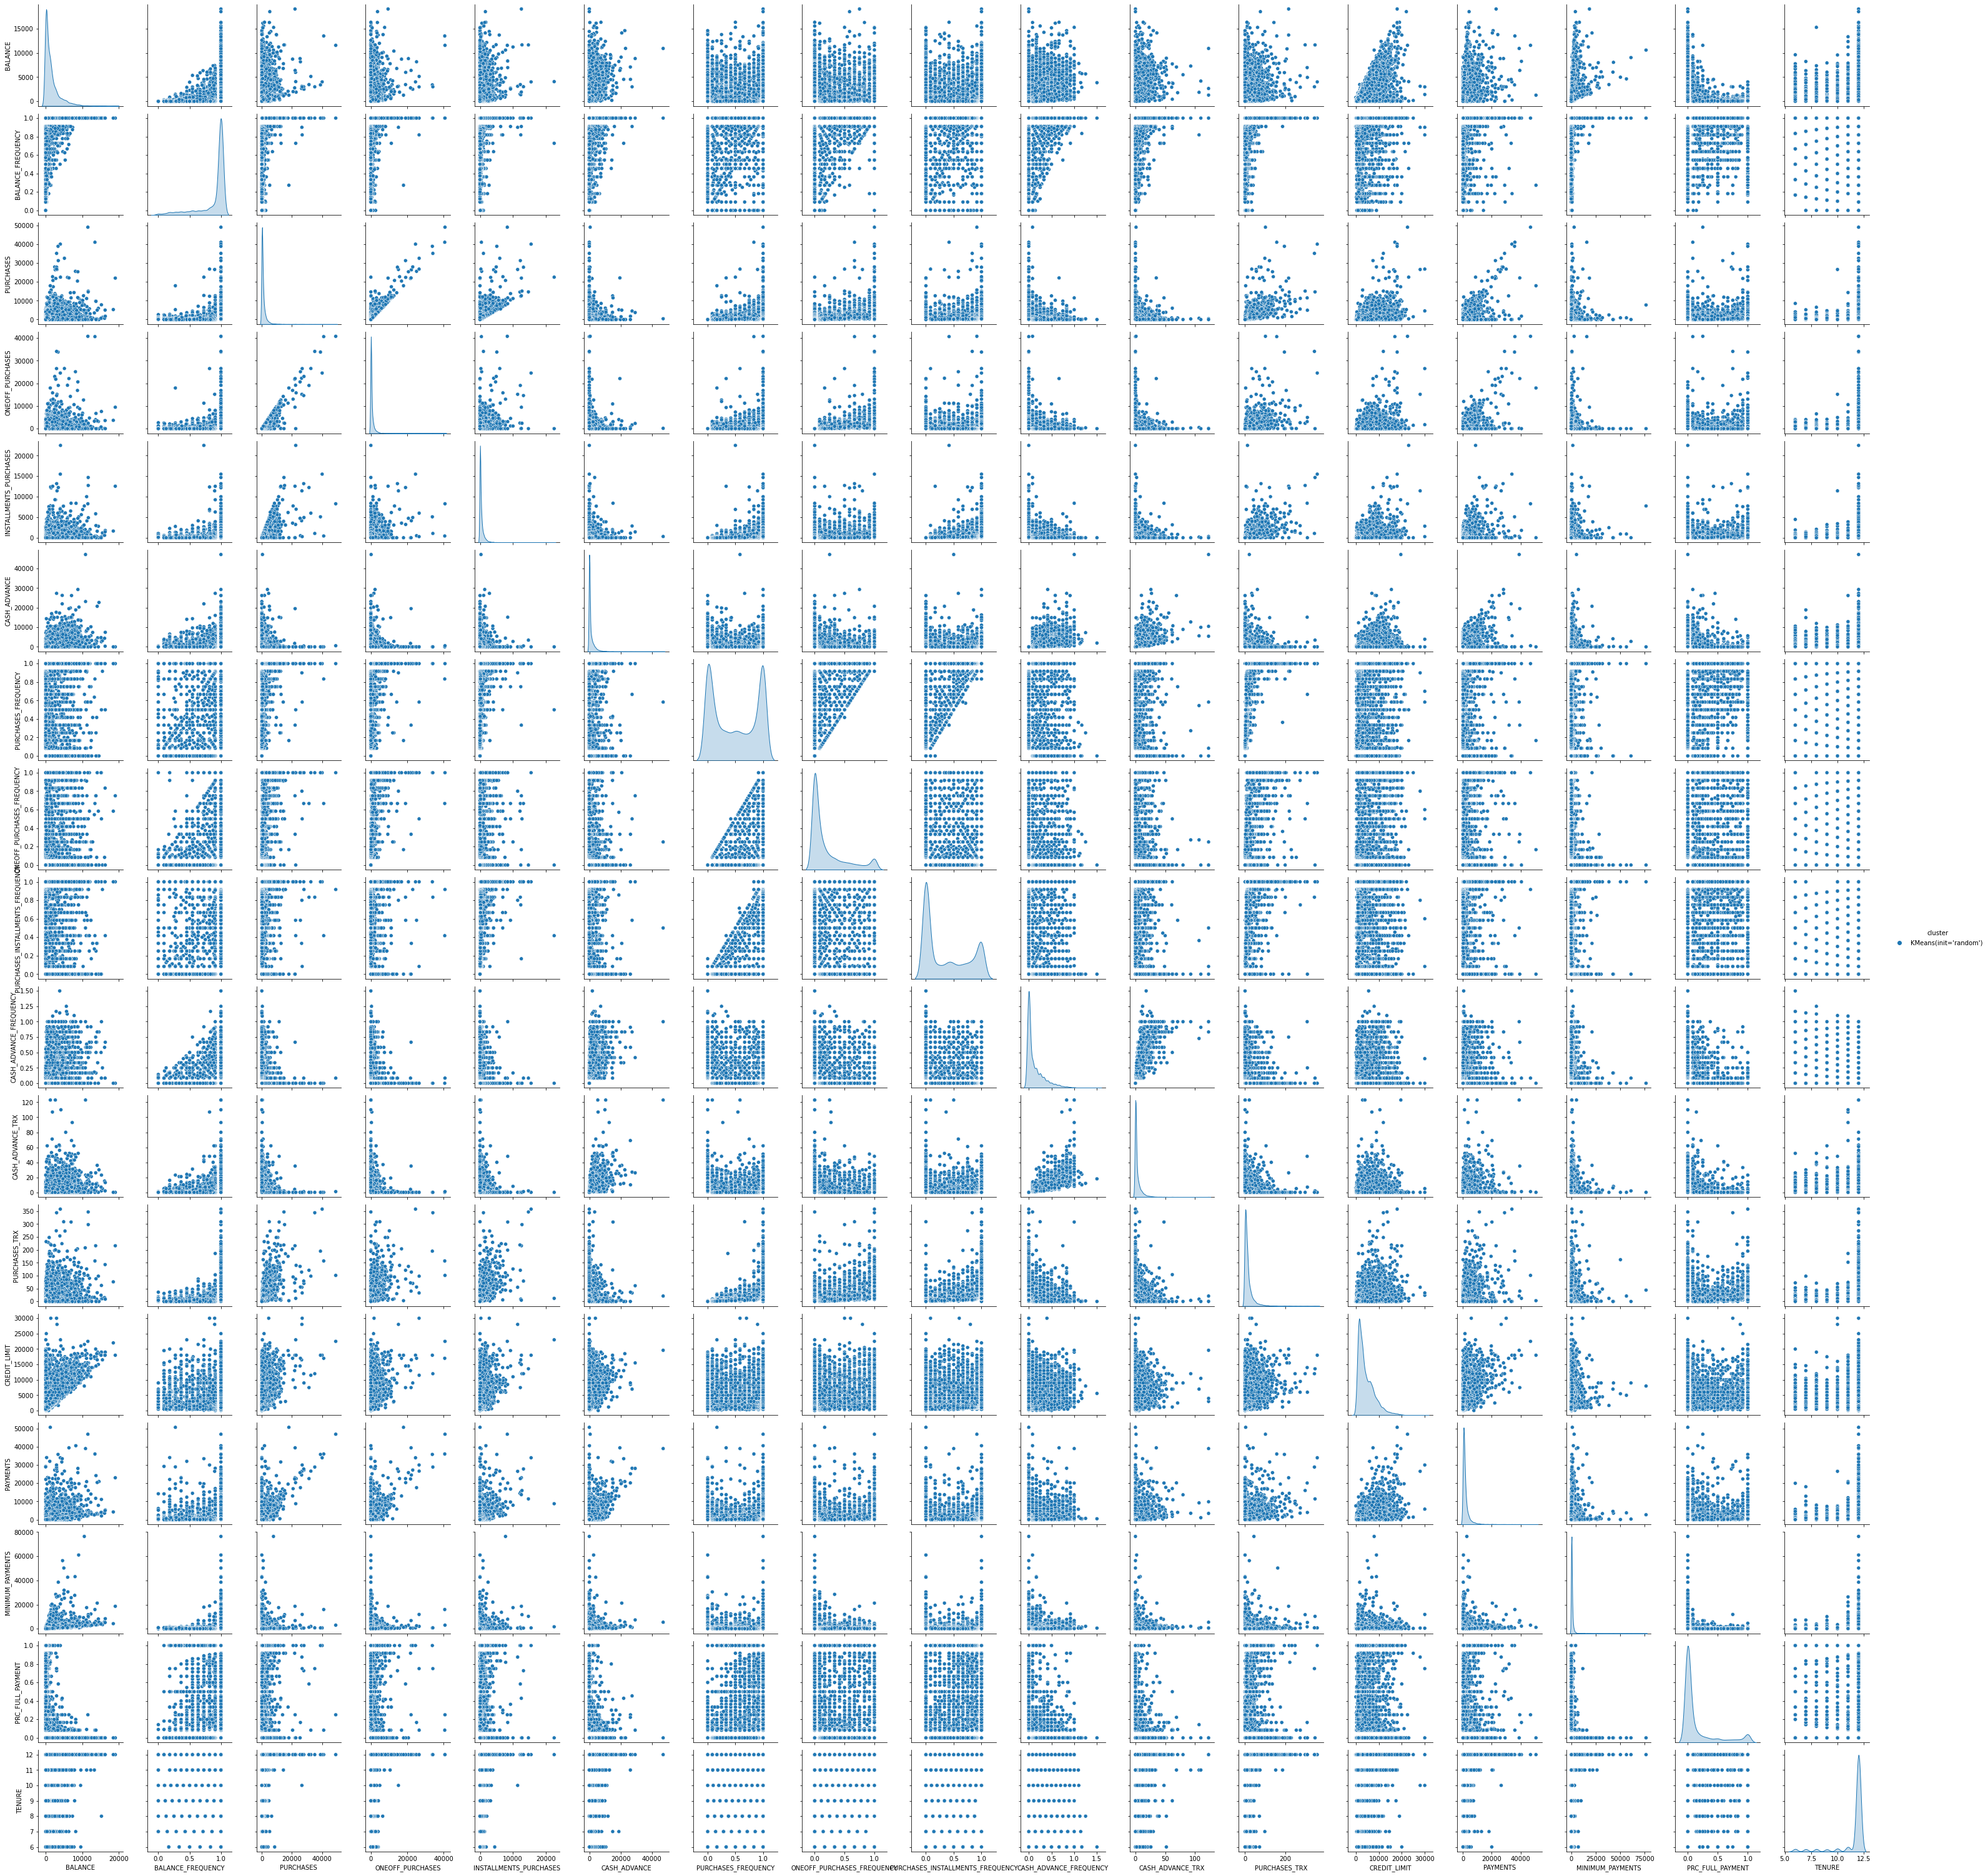

In [68]:
data["cluster"] = y_pred
cols = list(data.columns)

sns.pairplot( data[ cols ], hue="cluster")

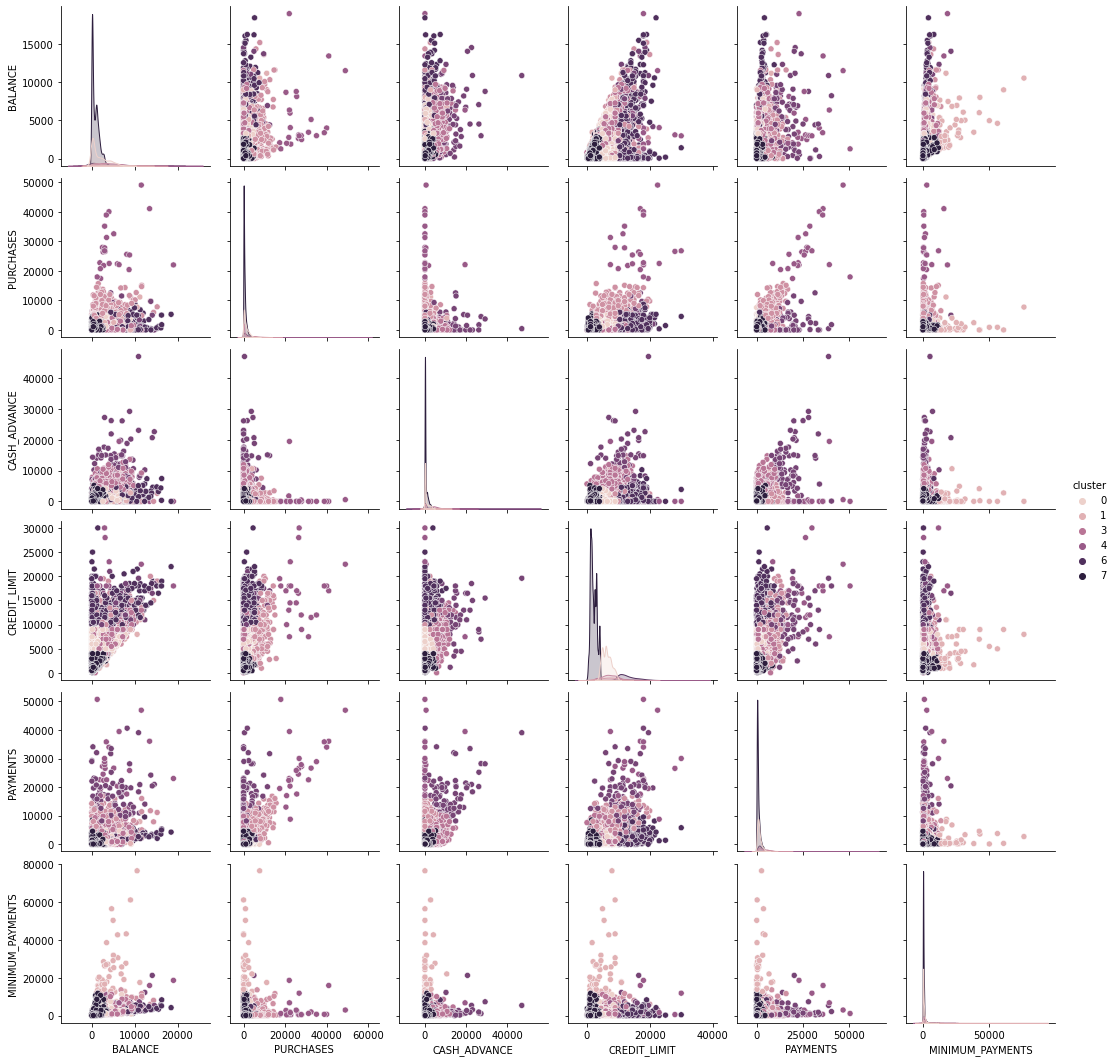

In [69]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300) 
best_vals = data[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

data["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( data[ best_cols ], hue="cluster")

1. Big Spenders with large Payments - they make expensive purchases and have a credit limit that is between average and high. This is only a small group of customers
2. Cash Advances with large Payments - this group takes the most cash advances. They make large payments, but this appears to be a small group of customers
3. Medium Spenders with third highest Payments - the second highest Purchases group
4. Highest Credit Limit but Frugal - this group doesn't make a lot of purchases. It looks like the 3rd largest group of customers
5. Cash Advances with Small Payments - this group likes taking cash advances, but make only small payments
6. Small Spenders and Low Credit Limit - they have the smallest Balances after the Smallest Spenders, their Credit Limit is in the bottom 3 groups, the second largest group of customers
7. Smallest Spenders and Lowest Credit Limit - this is the group with the lowest credit limit but they don't appear to buy much. Unfortunately this appears to be the largest group of customers
8. Highest Min Payments - this group has the highest minimum payments

So a marketing strategy that targeted the first five groups might be effective.